In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
# pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
# Feature Selection - Lasso
from sklearn.linear_model import LassoCV
# Modeling
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Machine Learning Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, Pool

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Data

In [5]:
train=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [6]:
test=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


**Feature descriptions:**

* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


In [7]:
print('TRAIN SET MISSING VALUES:')
print(train.isna().sum())
print('')
print('TEST SET MISSING VALUES:')
print(test.isna().sum())

TRAIN SET MISSING VALUES:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

TEST SET MISSING VALUES:
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


**Almost every feature has missing values**

In [8]:
df_all=pd.concat([train,test],axis=0).reset_index(drop=True)
df_all.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN
12969,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley,NaN


In [9]:
df_all.shape

(12970, 14)

In [10]:
df_all.isna().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**We will need to transform the data to be numeric (int64 or float64)**

In [12]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [13]:
df_all.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [14]:
df_all.nunique()

PassengerId     12970
HomePlanet          3
CryoSleep           2
Cabin            9825
Destination         3
Age                80
VIP                 2
RoomService      1578
FoodCourt        1953
ShoppingMall     1367
Spa              1679
VRDeck           1642
Name            12629
Transported         2
dtype: int64

## Exploratory data analysis

In [15]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [16]:
train.Transported.value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

**we can say based on values The target is highly balanced**

In [17]:
train.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [18]:
train.CryoSleep.value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [19]:
train.VIP.value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [20]:
train.HomePlanet.value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [21]:
categorical_variables = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig = make_subplots(rows=2, cols=2, subplot_titles=categorical_variables)

for i, var in enumerate(categorical_variables):
    row = i // 2 + 1
    col = i % 2 + 1
    counts = train.groupby([var, 'Transported']).size().unstack(fill_value=0)
    for transported_value in counts.columns:
        fig.add_trace(
            go.Bar(
            x=counts.index,
            y=counts[transported_value],
            name=f'Transported={transported_value}',
            marker=dict(color=['#FF6666', '#3BCEAC'][transported_value])),
            row=row, col=col)

fig.update_layout(
    height=800, width=1000, showlegend=False)

fig.update_layout(
    title={
        'text': 'Categorical Variables - Transported',
        'x':0.5,
        'font': {'family': "Arial, sans-serif", 'size': 24}
    })

fig.add_trace(
    go.Bar(name='Transported=0', marker=dict(color='#FFD23F')), row=2, col=2
)
fig.add_trace(
    go.Bar(name='Transported=1', marker=dict(color='#3BCEAC')), row=2, col=2
)

fig.show()

In [22]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [23]:
train[['Transported','VIP']].groupby('VIP').sum()

,Transported
VIP,
False,4198
True,76


<Axes: xlabel='CryoSleep', ylabel='count'>

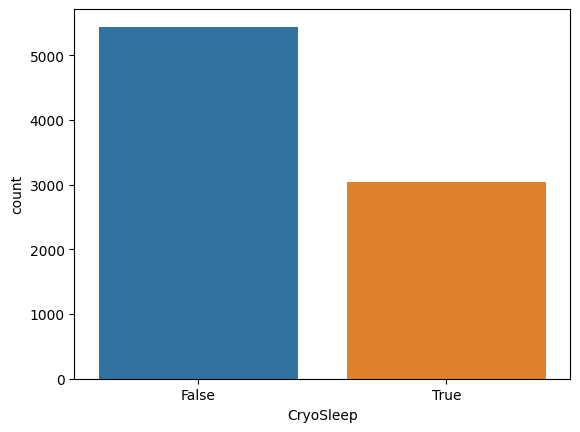

In [24]:
sns.countplot(data=train,x='CryoSleep')

<Axes: xlabel='Age', ylabel='Count'>

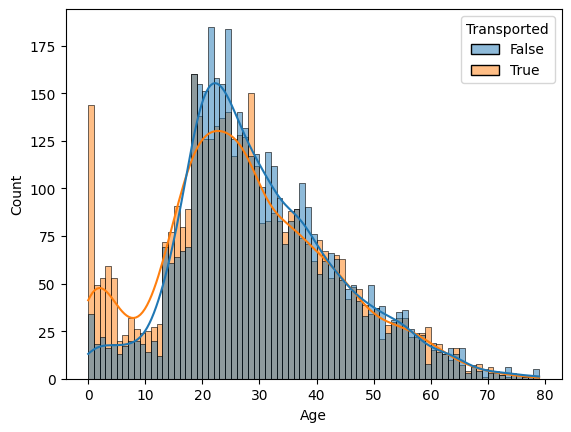

In [25]:
sns.histplot(data=train, x='Age', hue='Transported', binwidth=1, kde=True)

In [26]:
train.Destination.value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [27]:
df=df_all.copy()
df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [28]:
df['total_charge']=df_all[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_charge
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0


<Axes: xlabel='Age', ylabel='total_charge'>

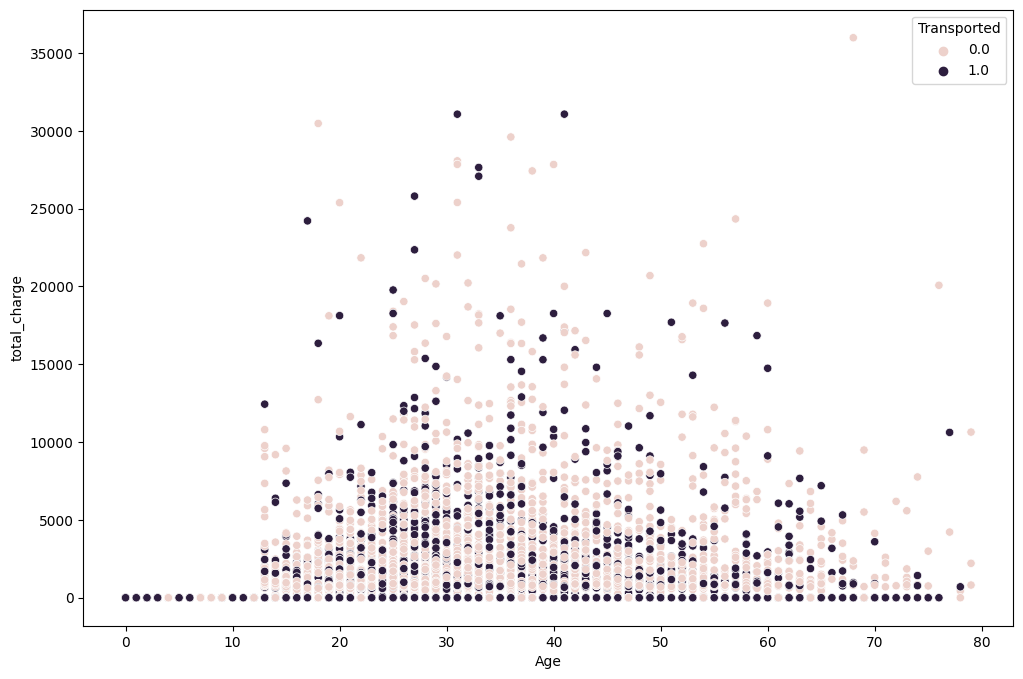

In [29]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='Age',y='total_charge',hue='Transported')

## Feature Engineering 

In [30]:
df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_charge
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0


**The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard**

In [31]:
df_all.Cabin.str.split('/').str.get(0).value_counts()

Cabin
F    4239
G    3781
E    1323
B    1141
C    1102
D     720
A     354
T      11
Name: count, dtype: int64

In [32]:
df_all.Cabin.str.split('/').str.get(2).value_counts()

Cabin
S    6381
P    6290
Name: count, dtype: int64

In [33]:
df_all.Cabin.value_counts()

Cabin
G/734/S     8
G/160/P     8
D/176/S     7
G/1476/S    7
B/201/P     7
           ..
E/317/P     1
F/1039/P    1
F/1038/P    1
C/158/P     1
G/1498/S    1
Name: count, Length: 9825, dtype: int64

In [34]:
df_all.Cabin.isna().sum()

299

In [35]:
df['cabin_deck']=df_all.Cabin.str.split('/').str.get(0)
df['cabin_num']=df_all.Cabin.str.split('/').str.get(1)
df['cabin_side']=df_all.Cabin.str.split('/').str.get(2)

df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_charge,cabin_deck,cabin_num,cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,A,0,S


**Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group**

In [36]:
df_all.PassengerId.str.split('_').str.get(0).value_counts()

PassengerId
6499    8
8728    8
0984    8
4256    8
6986    8
       ..
5190    1
5187    1
5186    1
5185    1
9277    1
Name: count, Length: 9280, dtype: int64

In [37]:
df_all.PassengerId.str.split('_').str.get(1).value_counts()

PassengerId
01    9280
02    2135
03     840
04     338
05     184
06     108
07      66
08      19
Name: count, dtype: int64

In [38]:
df['Id_gggg']=df_all.PassengerId.str.split('_').str.get(0)
df['Id_pp']=df_all.PassengerId.str.split('_').str.get(1)


df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_charge,cabin_deck,cabin_num,cabin_side,Id_gggg,Id_pp
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,B,0,P,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,F,0,S,0002,01


In [39]:
df_all.HomePlanet.value_counts()

HomePlanet
Earth     6865
Europa    3133
Mars      2684
Name: count, dtype: int64

In [40]:
df_all.Destination.value_counts()

Destination
TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: count, dtype: int64

In [41]:
home_map={'Earth':1,'Europa':2,'Mars':3}
Cyro_map={True:1,False:0}
dest_map={'TRAPPIST-1e':1,'55 Cancri e':2,'PSO J318.5-22':3}
df['HomePlanet']=df_all['HomePlanet'].map(home_map)
df['Destination']=df_all['Destination'].map(dest_map)
df['CryoSleep']=df_all['CryoSleep'].map(Cyro_map)
df['VIP']=df_all['VIP'].map(Cyro_map)
df['Transported']=df_all['Transported'].map(Cyro_map)


df.head(3)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_charge,cabin_deck,cabin_num,cabin_side,Id_gggg,Id_pp
0,0001_01,2.0,0.0,B/0/P,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,0.0,B,0,P,0001,01
1,0002_01,1.0,0.0,F/0/S,1.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,736.0,F,0,S,0002,01
2,0003_01,2.0,0.0,A/0/S,1.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,10383.0,A,0,S,0003,01


In [42]:
df['last_name']=df_all['Name'].str.split(' ').str.get(1)
df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,total_charge,cabin_deck,cabin_num,cabin_side,Id_gggg,Id_pp,last_name
0,0001_01,2.0,0.0,B/0/P,1.0,39.0,0.0,0.0,0.0,0.0,...,0.0,Maham Ofracculy,0.0,0.0,B,0,P,0001,01,Ofracculy
1,0002_01,1.0,0.0,F/0/S,1.0,24.0,0.0,109.0,9.0,25.0,...,44.0,Juanna Vines,1.0,736.0,F,0,S,0002,01,Vines
2,0003_01,2.0,0.0,A/0/S,1.0,58.0,1.0,43.0,3576.0,0.0,...,49.0,Altark Susent,0.0,10383.0,A,0,S,0003,01,Susent


In [43]:
df.isna().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
total_charge       0
cabin_deck       299
cabin_num        299
cabin_side       299
Id_gggg            0
Id_pp              0
last_name        294
dtype: int64

In [44]:
test.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale
4276,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley


In [45]:
df['cabin_num']=pd.to_numeric(df['cabin_num'], errors='coerce')

In [46]:
df1=df.copy()

In [47]:
df1['cabin_side'].value_counts()

cabin_side
S    6381
P    6290
Name: count, dtype: int64

In [48]:
df1['cabin_deck']=df.groupby('Id_gggg')['cabin_deck'].apply(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)).reset_index(level=0, drop=True).fillna('F')
df1['cabin_num']=df.groupby('Id_gggg')['cabin_num'].apply(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)).reset_index(level=0, drop=True).fillna(82)
df1['cabin_side']=df.groupby('Id_gggg')['cabin_side'].apply(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)).reset_index(level=0, drop=True).fillna('S')


df1.isna().sum()
# df1.head()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
total_charge       0
cabin_deck         0
cabin_num          0
cabin_side         0
Id_gggg            0
Id_pp              0
last_name        294
dtype: int64

In [49]:
df1.cabin_deck.value_counts()

cabin_deck
F    4430
G    3821
E    1334
B    1161
C    1122
D     730
A     361
T      11
Name: count, dtype: int64

In [50]:
df1.cabin_side.value_counts()

cabin_side
S    6616
P    6354
Name: count, dtype: int64

In [51]:
deck_map={'F':1,'G':2,'E':3,'B':4,'C':5,'D':6,'A':7,'T':8}
side_map={'S':1,'P':2}
df1['cabin_deck']=df1['cabin_deck'].map(deck_map)
df1['cabin_side']=df1['cabin_side'].map(side_map)

df1.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,total_charge,cabin_deck,cabin_num,cabin_side,Id_gggg,Id_pp,last_name
0,0001_01,2.0,0.0,B/0/P,1.0,39.0,0.0,0.0,0.0,0.0,...,0.0,Maham Ofracculy,0.0,0.0,4,0.0,2,0001,01,Ofracculy
1,0002_01,1.0,0.0,F/0/S,1.0,24.0,0.0,109.0,9.0,25.0,...,44.0,Juanna Vines,1.0,736.0,1,0.0,1,0002,01,Vines
2,0003_01,2.0,0.0,A/0/S,1.0,58.0,1.0,43.0,3576.0,0.0,...,49.0,Altark Susent,0.0,10383.0,7,0.0,1,0003,01,Susent


In [52]:
df1.cabin_side.value_counts()

cabin_side
1    6616
2    6354
Name: count, dtype: int64

In [53]:
df1.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,total_charge,cabin_deck,cabin_num,cabin_side,Id_gggg,Id_pp,last_name
0,0001_01,2.0,0.0,B/0/P,1.0,39.0,0.0,0.0,0.0,0.0,...,0.0,Maham Ofracculy,0.0,0.0,4,0.0,2,0001,01,Ofracculy
1,0002_01,1.0,0.0,F/0/S,1.0,24.0,0.0,109.0,9.0,25.0,...,44.0,Juanna Vines,1.0,736.0,1,0.0,1,0002,01,Vines


<Axes: >

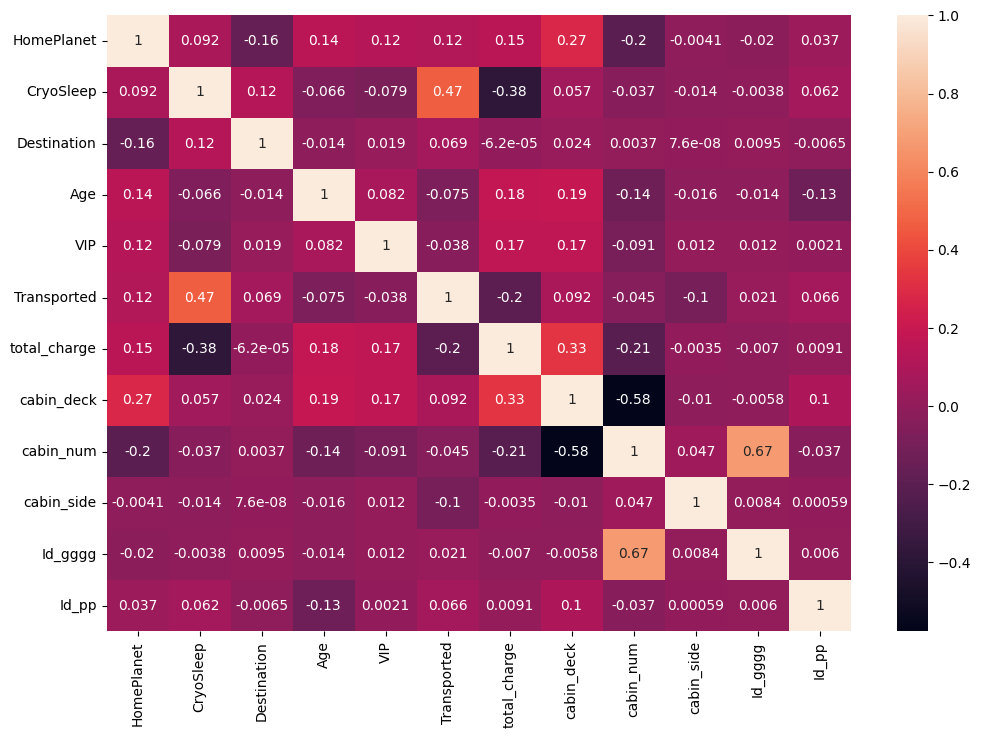

In [54]:
df2=df1.drop(['PassengerId','Cabin','Name','last_name','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],axis=1)

plt.figure(figsize=(12, 8)) 
sns.heatmap(df2.corr(),annot=True)

In [55]:
df2.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,total_charge,cabin_deck,cabin_num,cabin_side,Id_gggg,Id_pp
0,2.0,0.0,1.0,39.0,0.0,0.0,0.0,4,0.0,2,0001,01
1,1.0,0.0,1.0,24.0,0.0,1.0,736.0,1,0.0,1,0002,01


In [56]:
df2.dtypes

HomePlanet      float64
CryoSleep       float64
Destination     float64
Age             float64
VIP             float64
Transported     float64
total_charge    float64
cabin_deck        int64
cabin_num       float64
cabin_side        int64
Id_gggg          object
Id_pp            object
dtype: object

In [57]:
df2['Id_gggg']=pd.to_numeric(df2['Id_gggg'])
df2['Id_pp']=pd.to_numeric(df2['Id_pp'])

df2.dtypes

HomePlanet      float64
CryoSleep       float64
Destination     float64
Age             float64
VIP             float64
Transported     float64
total_charge    float64
cabin_deck        int64
cabin_num       float64
cabin_side        int64
Id_gggg           int64
Id_pp             int64
dtype: object

In [58]:
df2.shape

(12970, 12)

In [59]:
df3=df2.copy()

In [60]:
df3.isna().sum()

HomePlanet       288
CryoSleep        310
Destination      274
Age              270
VIP              296
Transported     4277
total_charge       0
cabin_deck         0
cabin_num          0
cabin_side         0
Id_gggg            0
Id_pp              0
dtype: int64

In [61]:
df3.Age.fillna(df3.Age.median(),inplace=True)
df3.HomePlanet.fillna(df3.HomePlanet.mode()[0],inplace=True)
df3.CryoSleep.fillna(df3.CryoSleep.mode()[0],inplace=True)
df3.Destination.fillna(df3.Destination.mode()[0],inplace=True)
df3.VIP.fillna(df3.VIP.mode()[0],inplace=True)
df3.isna().sum()

HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
Transported     4277
total_charge       0
cabin_deck         0
cabin_num          0
cabin_side         0
Id_gggg            0
Id_pp              0
dtype: int64

In [62]:
test.shape

(4277, 13)

In [63]:
train.shape

(8693, 14)

# Modeling

In [64]:
final_train=df3[df3['Transported'].notnull()]
final_test=df3[df3['Transported'].isnull()]
print('final_train : ',final_train.shape,'\nfinal_test :',final_test.shape)

final_train :  (8693, 12) 
final_test : (4277, 12)


In [65]:
X=final_train.drop('Transported', axis=1)
y = final_train['Transported']
X.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,total_charge,cabin_deck,cabin_num,cabin_side,Id_gggg,Id_pp
0,2.0,0.0,1.0,39.0,0.0,0.0,4,0.0,2,1,1
1,1.0,0.0,1.0,24.0,0.0,736.0,1,0.0,1,2,1


In [66]:
def evaluate_model(model, X_test, y_test, model_name, metrics_df):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    score=round(model.score(X_train, y_train) * 100, 2)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = None
    print(confusion_matrix(y_test, y_pred))
    print("-" * 30)
    new_row = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        'ROC-AUC': [roc_auc],
        'model_score':[score]
    })
    if new_row.Model.iloc[0] not  in metrics_df['Model'].values:
      metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)
    print(classification_report(y_test, y_pred, zero_division=1))
    print("-" * 30)
    return metrics_df
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC'])

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=3)
X_train.shape

(6085, 11)

In [68]:
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)

metrics_df = evaluate_model(log_reg, X_test, y_test, 'Logistic Regression', metrics_df)
metrics_df

[[1052  249]
 [ 499  808]]
------------------------------
              precision    recall  f1-score   support

         0.0       0.68      0.81      0.74      1301
         1.0       0.76      0.62      0.68      1307

    accuracy                           0.71      2608
   macro avg       0.72      0.71      0.71      2608
weighted avg       0.72      0.71      0.71      2608

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,model_score
0,Logistic Regression,0.71319,0.764428,0.61821,0.683587,0.760089,71.59


In [69]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
metrics_df=evaluate_model(random_forest, X_test, y_test, 'Random Forest', metrics_df)
metrics_df

[[1075  226]
 [ 438  869]]
------------------------------
              precision    recall  f1-score   support

         0.0       0.71      0.83      0.76      1301
         1.0       0.79      0.66      0.72      1307

    accuracy                           0.75      2608
   macro avg       0.75      0.75      0.74      2608
weighted avg       0.75      0.75      0.74      2608

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,model_score
0,Logistic Regression,0.713190,0.764428,0.618210,0.683587,0.760089,71.59
1,Random Forest,0.745399,0.793607,0.664881,0.723564,0.808735,100.00


In [70]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)


metrics_df = evaluate_model(decision_tree, X_test, y_test, 'Decision Tree', metrics_df)
metrics_df

[[905 396]
 [393 914]]
------------------------------
              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70      1301
         1.0       0.70      0.70      0.70      1307

    accuracy                           0.70      2608
   macro avg       0.70      0.70      0.70      2608
weighted avg       0.70      0.70      0.70      2608

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,model_score
0,Logistic Regression,0.713190,0.764428,0.618210,0.683587,0.760089,71.59
1,Random Forest,0.745399,0.793607,0.664881,0.723564,0.808735,100.00
2,Decision Tree,0.697469,0.697710,0.699311,0.698510,0.697465,100.00


In [71]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
metrics_df=evaluate_model(knn, X_test, y_test, 'k-NN', metrics_df)
metrics_df

[[921 380]
 [438 869]]
------------------------------
              precision    recall  f1-score   support

         0.0       0.68      0.71      0.69      1301
         1.0       0.70      0.66      0.68      1307

    accuracy                           0.69      2608
   macro avg       0.69      0.69      0.69      2608
weighted avg       0.69      0.69      0.69      2608

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,model_score
0,Logistic Regression,0.713190,0.764428,0.618210,0.683587,0.760089,71.59
1,Random Forest,0.745399,0.793607,0.664881,0.723564,0.808735,100.00
2,Decision Tree,0.697469,0.697710,0.699311,0.698510,0.697465,100.00
3,k-NN,0.686350,0.695757,0.664881,0.679969,0.743102,79.33


In [72]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
metrics_df=evaluate_model(gradient_boosting, X_test, y_test, 'Gradient Boosting', metrics_df)
metrics_df

[[1061  240]
 [ 419  888]]
------------------------------
              precision    recall  f1-score   support

         0.0       0.72      0.82      0.76      1301
         1.0       0.79      0.68      0.73      1307

    accuracy                           0.75      2608
   macro avg       0.75      0.75      0.75      2608
weighted avg       0.75      0.75      0.75      2608

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,model_score
0,Logistic Regression,0.713190,0.764428,0.618210,0.683587,0.760089,71.59
1,Random Forest,0.745399,0.793607,0.664881,0.723564,0.808735,100.00
2,Decision Tree,0.697469,0.697710,0.699311,0.698510,0.697465,100.00
3,k-NN,0.686350,0.695757,0.664881,0.679969,0.743102,79.33
4,Gradient Boosting,0.747316,0.787234,0.679419,0.729363,0.812758,77.19


In [73]:
neural_network = MLPClassifier(max_iter=1000)
neural_network.fit(X_train, y_train)
metrics_df=evaluate_model(neural_network, X_test, y_test, 'Neural Network', metrics_df)
metrics_df

[[846 455]
 [374 933]]
------------------------------
              precision    recall  f1-score   support

         0.0       0.69      0.65      0.67      1301
         1.0       0.67      0.71      0.69      1307

    accuracy                           0.68      2608
   macro avg       0.68      0.68      0.68      2608
weighted avg       0.68      0.68      0.68      2608

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,model_score
0,Logistic Regression,0.713190,0.764428,0.618210,0.683587,0.760089,71.59
1,Random Forest,0.745399,0.793607,0.664881,0.723564,0.808735,100.00
2,Decision Tree,0.697469,0.697710,0.699311,0.698510,0.697465,100.00
3,k-NN,0.686350,0.695757,0.664881,0.679969,0.743102,79.33
4,Gradient Boosting,0.747316,0.787234,0.679419,0.729363,0.812758,77.19
5,Neural Network,0.682132,0.672190,0.713849,0.692393,0.728945,70.11


In [74]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
metrics_df=evaluate_model(xgb, X_test, y_test, 'XGBoost', metrics_df)
metrics_df

[[1032  269]
 [ 416  891]]
------------------------------
              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75      1301
         1.0       0.77      0.68      0.72      1307

    accuracy                           0.74      2608
   macro avg       0.74      0.74      0.74      2608
weighted avg       0.74      0.74      0.74      2608

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,model_score
0,Logistic Regression,0.713190,0.764428,0.618210,0.683587,0.760089,71.59
1,Random Forest,0.745399,0.793607,0.664881,0.723564,0.808735,100.00
2,Decision Tree,0.697469,0.697710,0.699311,0.698510,0.697465,100.00
3,k-NN,0.686350,0.695757,0.664881,0.679969,0.743102,79.33
4,Gradient Boosting,0.747316,0.787234,0.679419,0.729363,0.812758,77.19
5,Neural Network,0.682132,0.672190,0.713849,0.692393,0.728945,70.11
6,XGBoost,0.737347,0.768103,0.681714,0.722335,0.807005,91.98


In [75]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
metrics_df=evaluate_model(nb_model, X_test, y_test, 'Naive_bayes', metrics_df)
metrics_df

[[1043  258]
 [ 494  813]]
------------------------------
              precision    recall  f1-score   support

         0.0       0.68      0.80      0.74      1301
         1.0       0.76      0.62      0.68      1307

    accuracy                           0.71      2608
   macro avg       0.72      0.71      0.71      2608
weighted avg       0.72      0.71      0.71      2608

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,model_score
0,Logistic Regression,0.713190,0.764428,0.618210,0.683587,0.760089,71.59
1,Random Forest,0.745399,0.793607,0.664881,0.723564,0.808735,100.00
2,Decision Tree,0.697469,0.697710,0.699311,0.698510,0.697465,100.00
3,k-NN,0.686350,0.695757,0.664881,0.679969,0.743102,79.33
4,Gradient Boosting,0.747316,0.787234,0.679419,0.729363,0.812758,77.19
5,Neural Network,0.682132,0.672190,0.713849,0.692393,0.728945,70.11
6,XGBoost,0.737347,0.768103,0.681714,0.722335,0.807005,91.98
7,Naive_bayes,0.711656,0.759104,0.622035,0.683768,0.749489,72.59


In [76]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
metrics_df=evaluate_model(lgbm, X_test, y_test, 'LightGBM', metrics_df)
metrics_df

[LightGBM] [Info] Number of positive: 3071, number of negative: 3014
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 875
[LightGBM] [Info] Number of data points in the train set: 6085, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504684 -> initscore=0.018735
[LightGBM] [Info] Start training from score 0.018735
[[1077  224]
 [ 419  888]]
------------------------------
              precision    recall  f1-score   support

         0.0       0.72      0.83      0.77      1301
         1.0       0.80      0.68      0.73      1307

    accuracy                           0.75      2608
   macro avg       0.76      0.75      0.75      2608
weighted avg       0.76      0.75      0.75      2608

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,model_score
0,Logistic Regression,0.713190,0.764428,0.618210,0.683587,0.760089,71.59
1,Random Forest,0.745399,0.793607,0.664881,0.723564,0.808735,100.00
2,Decision Tree,0.697469,0.697710,0.699311,0.698510,0.697465,100.00
3,k-NN,0.686350,0.695757,0.664881,0.679969,0.743102,79.33
4,Gradient Boosting,0.747316,0.787234,0.679419,0.729363,0.812758,77.19
5,Neural Network,0.682132,0.672190,0.713849,0.692393,0.728945,70.11
6,XGBoost,0.737347,0.768103,0.681714,0.722335,0.807005,91.98
7,Naive_bayes,0.711656,0.759104,0.622035,0.683768,0.749489,72.59
8,LightGBM,0.753451,0.798561,0.679419,0.734188,0.817885,84.65


In [77]:
catb=CatBoostClassifier(verbose=0)
catb.fit(X_train, y_train)
metrics_df=evaluate_model(catb, X_test, y_test, 'CatBoost', metrics_df)
metrics_df

[[1066  235]
 [ 407  900]]
------------------------------
              precision    recall  f1-score   support

         0.0       0.72      0.82      0.77      1301
         1.0       0.79      0.69      0.74      1307

    accuracy                           0.75      2608
   macro avg       0.76      0.75      0.75      2608
weighted avg       0.76      0.75      0.75      2608

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,model_score
0,Logistic Regression,0.713190,0.764428,0.618210,0.683587,0.760089,71.59
1,Random Forest,0.745399,0.793607,0.664881,0.723564,0.808735,100.00
2,Decision Tree,0.697469,0.697710,0.699311,0.698510,0.697465,100.00
3,k-NN,0.686350,0.695757,0.664881,0.679969,0.743102,79.33
4,Gradient Boosting,0.747316,0.787234,0.679419,0.729363,0.812758,77.19
5,Neural Network,0.682132,0.672190,0.713849,0.692393,0.728945,70.11
6,XGBoost,0.737347,0.768103,0.681714,0.722335,0.807005,91.98
7,Naive_bayes,0.711656,0.759104,0.622035,0.683768,0.749489,72.59
8,LightGBM,0.753451,0.798561,0.679419,0.734188,0.817885,84.65
9,CatBoost,0.753834,0.792952,0.688600,0.737101,0.821097,83.43


In [78]:
metrics_df.sort_values(by=["Accuracy", "ROC-AUC"], ascending=[False, False])

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,model_score
9,CatBoost,0.753834,0.792952,0.688600,0.737101,0.821097,83.43
8,LightGBM,0.753451,0.798561,0.679419,0.734188,0.817885,84.65
4,Gradient Boosting,0.747316,0.787234,0.679419,0.729363,0.812758,77.19
1,Random Forest,0.745399,0.793607,0.664881,0.723564,0.808735,100.00
6,XGBoost,0.737347,0.768103,0.681714,0.722335,0.807005,91.98
0,Logistic Regression,0.713190,0.764428,0.618210,0.683587,0.760089,71.59
7,Naive_bayes,0.711656,0.759104,0.622035,0.683768,0.749489,72.59
2,Decision Tree,0.697469,0.697710,0.699311,0.698510,0.697465,100.00
3,k-NN,0.686350,0.695757,0.664881,0.679969,0.743102,79.33
5,Neural Network,0.682132,0.672190,0.713849,0.692393,0.728945,70.11


**the CatBoost  gave better results than all other models**

**Best Model - CatBoost**

In [79]:
catboost_model = CatBoostClassifier(verbose=0, random_state=42)

param_grid = {
    'iterations': [100, 200],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'l2_leaf_reg': [1, 2, 3]
}

grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=0)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'depth': 8, 'iterations': 100, 'l2_leaf_reg': 2, 'learning_rate': 0.1}
Best Score:  0.7597370583401808


In [80]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

Test Accuracy:  0.7523006134969326


In [81]:
submission = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
submission.head(3)

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False


In [82]:
final_pred=best_model.predict(final_test).astype(bool)
final_pred

array([ True, False,  True, ...,  True,  True,  True])

In [83]:
submission['Transported']=final_pred
submission.head(2)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False


In [84]:
submission.to_csv('submission.csv', index=False)  #0.756

## TFDF model 

In [85]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf

2024-07-23 11:39:21.394427: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 11:39:21.394576: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 11:39:21.647689: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [86]:
train.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [87]:
tf_df=df_all.drop(['PassengerId','Name'],axis=1)

In [88]:
tf_df.isnull().sum().sort_values(ascending=False)

Transported     4277
CryoSleep        310
ShoppingMall     306
Cabin            299
VIP              296
FoodCourt        289
HomePlanet       288
Spa              284
Destination      274
Age              270
VRDeck           268
RoomService      263
dtype: int64

**this datatset also has boolean fields with missing values. TF-DF doesn't support boolean fields yet. So we need to convert those fields into int. To account for the missing values in the boolean fields, we will replace them with zero.**

In [89]:
tf_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = tf_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
tf_df.isnull().sum().sort_values(ascending=False)

Transported     4277
Cabin            299
HomePlanet       288
Destination      274
Age              270
RoomService      263
CryoSleep          0
VIP                0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
dtype: int64

In [90]:
tf_df['VIP'] = tf_df['VIP'].astype(int)
tf_df['CryoSleep'] = tf_df['CryoSleep'].astype(int)
tf_df.head(2)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True


In [91]:
tf_df[['cabin_deck','cabin_num','cabin_side']]=tf_df['Cabin'].str.split('/',expand=True)

In [92]:
tf_df=tf_df.drop('Cabin',axis=1)
tf_df.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cabin_deck,cabin_num,cabin_side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True,F,0,S


In [93]:
tr=tf_df[tf_df['Transported'].notnull()]
te=tf_df[tf_df['Transported'].isnull()]
print('final_train : ',tr.shape,'\nfinal_test :',te.shape)

final_train :  (8693, 14) 
final_test : (4277, 14)


In [94]:
tf_df.isna().sum()

HomePlanet       288
CryoSleep          0
Destination      274
Age              270
VIP                0
RoomService      263
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Transported     4277
cabin_deck       299
cabin_num        299
cabin_side       299
dtype: int64

In [95]:
te=te.drop('Transported',axis=1)
te.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,cabin_deck,cabin_num,cabin_side
8693,Earth,1,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0,G,3,S
8694,Earth,0,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0,F,4,S


In [96]:
tr['Transported']=tr['Transported'].astype(int)
tr.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cabin_deck,cabin_num,cabin_side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S


In [97]:
def split_dataset(tr, test_ratio=0.20):
  test_indices = np.random.rand(len(tr)) < test_ratio
  return tr[~test_indices], tr[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(tr)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

6981 examples in training, 1712 examples in testing.


In [98]:
label='Transported'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label)


In [99]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [100]:
rf = tfdf.keras.RandomForestModel()
rf.compile(metrics=["accuracy"])

Use /tmp/tmp3b26_d3d as temporary training directory


In [101]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:07.580724. Found 6981 examples.
Training model...


[INFO 24-07-23 11:41:54.1853 UTC kernel.cc:1233] Loading model from path /tmp/tmp3b26_d3d/model/ with prefix 7bc63eb23414473a


Model trained in 0:02:09.052220
Compiling model...


[INFO 24-07-23 11:41:55.4285 UTC decision_forest.cc:660] Model loaded with 300 root(s), 234620 node(s), and 13 input feature(s).
[INFO 24-07-23 11:41:55.4286 UTC abstract_model.cc:1344] Engine "RandomForestGeneric" built
[INFO 24-07-23 11:41:55.4286 UTC kernel.cc:1061] Use fast generic engine


Model compiled.


In [102]:
inspector = rf.make_inspector()
inspector.evaluation()
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 8s 74ms/step - loss: 0.0000e+00 - accuracy: 0.7897
loss: 0.0000
accuracy: 0.7897


In [103]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("CryoSleep" (1; #1), 127.0),
 ("RoomService" (1; #5), 63.0),
 ("Spa" (1; #7), 52.0),
 ("VRDeck" (1; #9), 32.0),
 ("ShoppingMall" (1; #6), 12.0),
 ("FoodCourt" (1; #3), 9.0),
 ("cabin_deck" (4; #11), 5.0)]

In [104]:
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(te)

# Get the predictions for testdata
predictions = rf.predict(test_ds)
n_predict = (predictions > 0.5).astype(bool)
n_predict

5/5 [==============================] - 0s 79ms/step


array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [105]:
submission_id = test.PassengerId
output = pd.DataFrame({'PassengerId': submission_id,
                       'Transported': n_predict.squeeze()})

output.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [106]:
output.to_csv('/kaggle/working/submission.csv', index=False) #Score: 0.78957